In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# Upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"caramelsashimi","key":"2d476f80c96b953fc1707d288d9e1c90"}'}

In [ ]:
# Create a .kaggle directory and move the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d coder98/emotionpain

Dataset URL: https://www.kaggle.com/datasets/coder98/emotionpain
License(s): unknown
100% 9.41G/9.42G [02:54<00:00, 140MB/s]
100% 9.42G/9.42G [02:54<00:00, 58.0MB/s]


In [ ]:
# Extract the downloaded dataset
!unzip emotionpain.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff188.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff189.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff190.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff191.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff192.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff193.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff194.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff195.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff196.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff197.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff198.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff199.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff200.png  
  inflating: 

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=19a9991e255daecd39f8ee6b65a5c18d76d4b7eaffe1ffce8dd949686516895e
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [ ]:
!pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

In [ ]:
# Creating the pkl data file

def create_train_data(TRAIN_DIR,Label_Dir,IMG_SIZE):
    training_data = []
    label_data=[]

    c0=0
    c1=0
    res=0

    #reading label only
    for folder in os.listdir(Label_Dir): # FACS & PSPI folders
        c0=0

        for inner_folder in os.listdir((Label_Dir+'/'+ folder)):
            path = os.path.join(Label_Dir,folder+'/'+ inner_folder)

            for file in os.listdir(path):

                file=os.path.join(path+'/'+file)
                with open(file) as f:
                    lines = f.readlines()
                    if (lines[0][3]=='0' and c0<340):
                      label_data.append('0')
                      res+=1
                      c0+=1
                    if(lines[0][3]!='0'):
                      label_data.append('1')
                      c1+=1
                    f.close()

    label_data.append('-1')
    print(str(res) + ' ' + str(c1))

    #reading images and its labels
    c=0
    c0=0
    c1=0
    res=0
    print(len(label_data))
    for folder in os.listdir(TRAIN_DIR):
        c0=0
        for inner_folder in os.listdir((TRAIN_DIR+'/'+folder)):
            path = os.path.join(TRAIN_DIR,folder+'/'+ inner_folder)
            for img in tqdm(os.listdir(path)):
                img=os.path.join(path+'/'+img)
                img_data = cv2.imread(img,cv2.IMREAD_COLOR)
                img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
                img_data = cv2.cvtColor(img_data,cv2.COLOR_RGB2BGR)
                print(str(c) + ' ' + str(len(label_data)))
                if (label_data[c]=='-1'):break
                if (label_data[c]=='0' and c0<340):
                  training_data.append([np.array(img_data), label_data[c]])
                  c0+=1
                  res+=1
                  c+=1
                if (label_data[c]!='0'):
                  training_data.append([np.array(img_data), label_data[c]])
                  c+=1
                  c1+=1

    print(str(res) + ' ' + str(c1))

    shuffle(training_data)
    dump(training_data, open('/content/drive/MyDrive/Colab Notebooks/saves/training_data.pkl', 'wb'))
    return training_data

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import numpy as np
import os
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to extract features using MobileNetV2
def extract_features(ImgSize):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(ImgSize, ImgSize, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    feature_extractor = Model(inputs=base_model.input, outputs=x)
    feature_extractor.trainable = False  # freeze weights of pre-trained layers -> won't update
    return feature_extractor

# Function to save the model using pickle
def save_checkpoint(svm, scaler, pca, path):
    with open(path, 'wb') as f:
        pickle.dump({'svm': svm, 'scaler': scaler, 'pca': pca}, f)
    print(f"Model checkpoint saved to {path}")

# Main training function with Random Search + SGD
def Train_SVM(ImgSize, checkpoint_path='/content/drive/MyDrive/Colab Notebooks/saves/svm_checkpoint.pkl'):
    # Load the dataset
    if os.path.exists('/content/drive/MyDrive/Colab Notebooks/saves/training_data.pkl'):
        with open('/content/drive/MyDrive/Colab Notebooks/saves/training_data.pkl', 'rb') as f:
            training_data = pickle.load(f)

    X = np.array([i[0] for i in training_data]).reshape(-1, ImgSize, ImgSize, 3)
    y = [i[1] for i in training_data]

    # Split data into training+validation and test sets
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Split training+validation set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.20, random_state=42)

    # Feature extraction using MobileNetV2
    feature_extractor = extract_features(ImgSize)
    train_features = feature_extractor.predict(X_train)
    val_features = feature_extractor.predict(X_val)
    test_features = feature_extractor.predict(X_test)

    # Standardize the features
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    val_features = scaler.transform(val_features)
    test_features = scaler.transform(test_features)

    # Dimensionality reduction using PCA
    pca = PCA(n_components=0.95)
    train_features = pca.fit_transform(train_features)
    val_features = pca.transform(val_features)
    test_features = pca.transform(test_features)

    # Define hyperparameter distribution for Random Search
    param_dist = {
        'alpha': [1e-4, 1e-3, 1e-2],  # Learning rate for SGD
        'penalty': ['l2', 'l1'],      # Regularization type
        'loss': ['hinge', 'log'],     # SVM loss for classification tasks
        'max_iter': [1000, 2000]      # Max number of iterations
    }

    # Perform Randomized Search
    random_search = RandomizedSearchCV(SGDClassifier(), param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
    random_search.fit(train_features, y_train)

    # Evaluate the model on the training set
    train_pred = random_search.best_estimator_.predict(train_features)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred, average='weighted')
    train_recall = recall_score(y_train, train_pred, average='weighted')
    train_cm = confusion_matrix(y_train, train_pred)
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Training Precision: {train_precision * 100:.2f}%")
    print(f"Training Recall: {train_recall * 100:.2f}%")
    print("Training Confusion Matrix:")
    print(train_cm)
    print()
    train_disp = ConfusionMatrixDisplay(train_cm, display_labels=['No Pain', 'Pain'])
    train_disp.plot()
    plt.title('Training Confusion Matrix')
    plt.show()
    print()

    # Evaluate the model on the validation set
    val_pred = random_search.best_estimator_.predict(val_features)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_precision = precision_score(y_val, val_pred, average='weighted')
    val_recall = recall_score(y_val, val_pred, average='weighted')
    val_cm = confusion_matrix(y_val, val_pred)
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Validation Precision: {val_precision * 100:.2f}%")
    print(f"Validation Recall: {val_recall * 100:.2f}%")
    print("Validation Confusion Matrix:")
    print(val_cm)
    print()
    val_disp = ConfusionMatrixDisplay(val_cm, display_labels=['No Pain', 'Pain'])
    val_disp.plot()
    plt.title('Validation Confusion Matrix')
    plt.show()
    print()

    # Best estimator for testing
    best_svm = random_search.best_estimator_

    # Save the model after training
    save_checkpoint(best_svm, scaler, pca, checkpoint_path)

    # Predict and evaluate on test data
    y_pred = best_svm.predict(test_features)

    # Evaluation metrics: accuracy, precision, recall, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    test_cm = confusion_matrix(y_test, y_pred)

    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Precision: {precision * 100:.2f}%")
    print(f"Test Recall: {recall * 100:.2f}%")
    print("Test Confusion Matrix:")
    print(test_cm)
    print()

    # Display the confusion matrix
    test_disp = ConfusionMatrixDisplay(test_cm, display_labels=['No Pain', 'Pain'])
    test_disp.plot()
    plt.title('Test Confusion Matrix')
    plt.show()

    return best_svm, feature_extractor, scaler, pca


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Training Accuracy: 80.88%
Training Precision: 80.90%
Training Recall: 80.88%
Training Confusion Matrix:
[[4470  957]
 [1104 4246]]



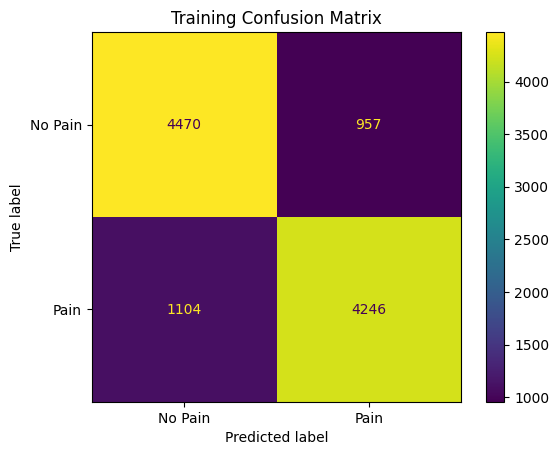


Validation Accuracy: 79.00%
Validation Precision: 79.00%
Validation Recall: 79.00%
Validation Confusion Matrix:
[[1073  273]
 [ 293 1056]]



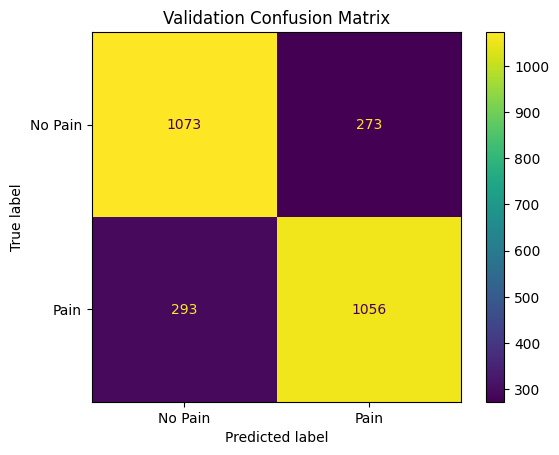


Model checkpoint saved to /content/drive/MyDrive/Colab Notebooks/saves/svm_checkpoint.pkl
Best Hyperparameters: {'penalty': 'l2', 'max_iter': 1000, 'loss': 'hinge', 'alpha': 0.01}
Test Accuracy: 79.63%
Test Precision: 79.64%
Test Recall: 79.63%
Test Confusion Matrix:
[[1369  329]
 [ 357 1313]]



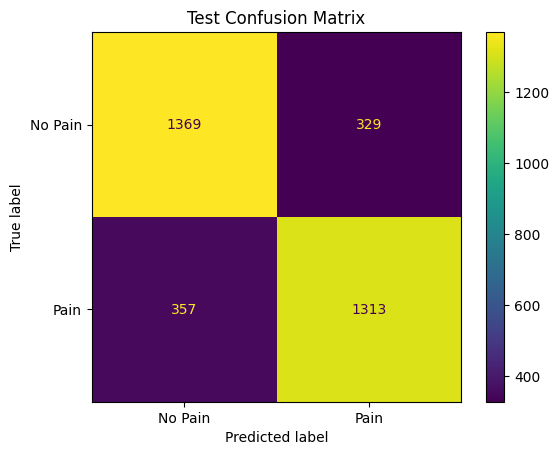

In [ ]:
svm_model, feature_extractor_model, data_scaler, pca_model = Train_SVM(200)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
from tensorflow.keras.preprocessing import image
import warnings
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

# Function to load the saved model, scaler, and PCA
def load_checkpoint(path):
    with open(path, 'rb') as f:
        checkpoint = pickle.load(f)
    svm = checkpoint['svm']
    scaler = checkpoint['scaler']
    pca = checkpoint['pca']
    return svm, scaler, pca

# Function to extract features using MobileNetV2
def extract_features(ImgSize):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(ImgSize, ImgSize, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    feature_extractor = Model(inputs=base_model.input, outputs=x)
    feature_extractor.trainable = False
    return feature_extractor

# Function to preprocess input image
def preprocess_image(img_path, ImgSize):
    # Load image
    img = image.load_img(img_path, target_size=(ImgSize, ImgSize))
    # Convert to numpy array
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to [0, 1]

    return img_array

# Prediction function
def predict_image(img_path, ImgSize, checkpoint_path='/content/drive/MyDrive/Colab Notebooks/saves/svm_checkpoint.pkl'):
    # Load the SVM model, scaler, and PCA
    svm, scaler, pca = load_checkpoint(checkpoint_path)

    # Load feature extractor
    feature_extractor = extract_features(ImgSize)

    # Preprocess the input image
    img_array = preprocess_image(img_path, ImgSize)

    # Extract features using MobileNetV2
    features = feature_extractor.predict(img_array)

    # Standardize the features
    features = scaler.transform(features)

    # Apply PCA for dimensionality reduction
    features = pca.transform(features)

    # Predict using the SVM
    prediction = svm.predict(features)

    # Display the input image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Input Image')
    plt.show()

    # Show prediction result
    if int(prediction[0]) == 1:
        print("Prediction: Pain")
    else:
        print("Prediction: No Pain")

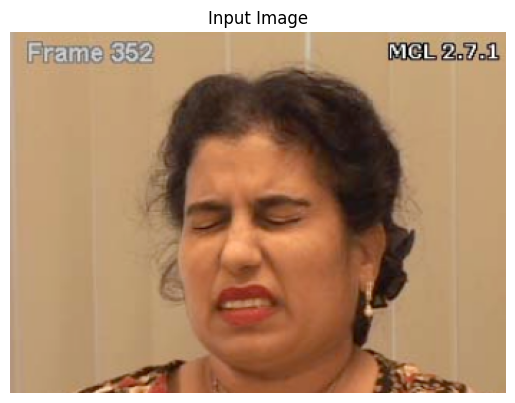

Prediction: No Pain


In [ ]:
# Example usage:
img_path = 'prediction_img.png'
ImgSize = 200  # Same image size used during training
predict_image(img_path, ImgSize)

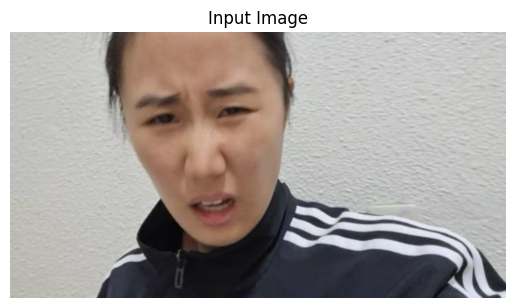

Prediction: No Pain


In [ ]:
img_path = 'prediction_img.jpg'
ImgSize = 200  # Same image size used during training
predict_image(img_path, ImgSize)

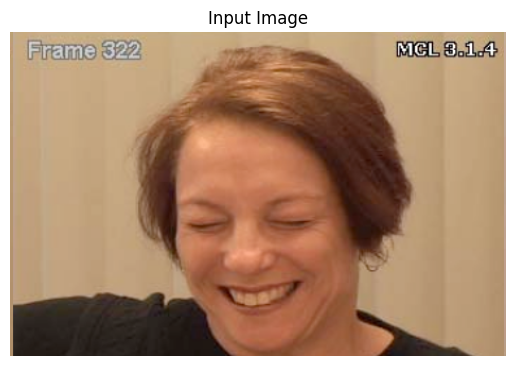

Prediction: No Pain


In [ ]:
img_path = 'prediction_img2.png'
ImgSize = 200  # Same image size used during training
predict_image(img_path, ImgSize)

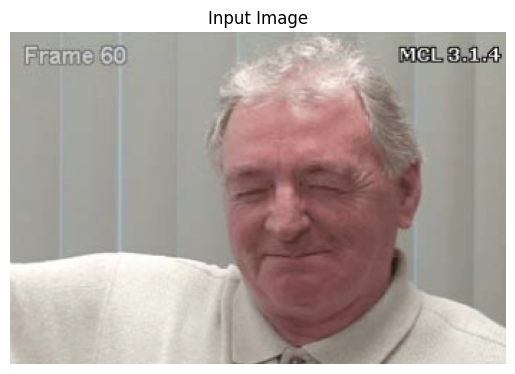

Prediction: No Pain


In [ ]:
img_path = 'prediction_img3.png'
ImgSize = 200  # Same image size used during training
predict_image(img_path, ImgSize)

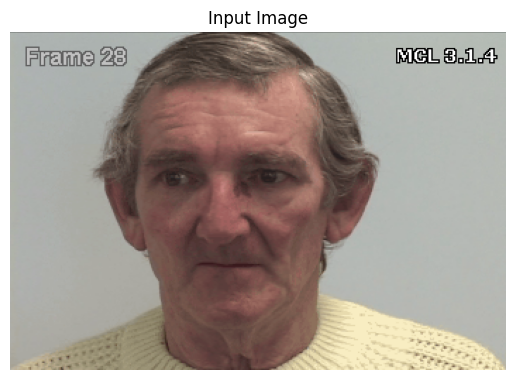

Prediction: No Pain


In [ ]:
img_path = 'gf097t2aaunaff028.png'
ImgSize = 200  # Same image size used during training
predict_image(img_path, ImgSize)

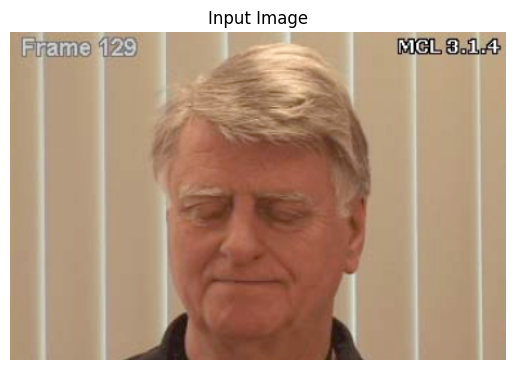

Prediction: Pain


In [ ]:
img_path = 'prediction_img4.png'
ImgSize = 200  # Same image size used during training
predict_image(img_path, ImgSize)

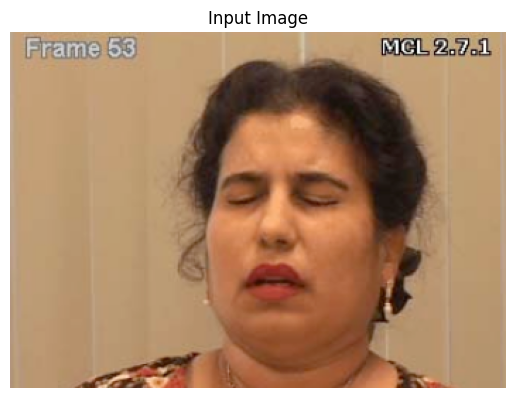

Prediction: No Pain


In [ ]:
img_path = 'prediction_img5.png'
ImgSize = 200  # Same image size used during training
predict_image(img_path, ImgSize)

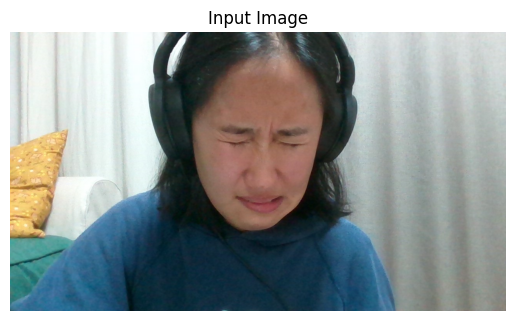

Prediction: No Pain


In [ ]:
img_path = 'KakaoTalk_20241028_220230995.png'
ImgSize = 200
predict_image(img_path, ImgSize)

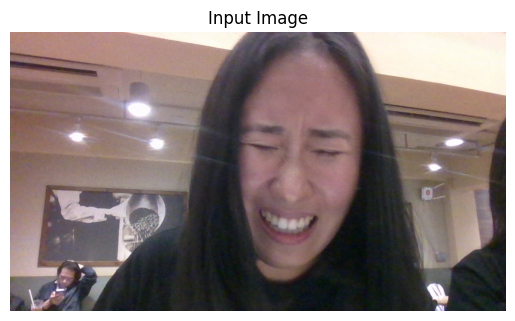

Prediction: No Pain


In [ ]:
img_path = 'KakaoTalk_20241028_220444096.png'
ImgSize = 200
predict_image(img_path, ImgSize)

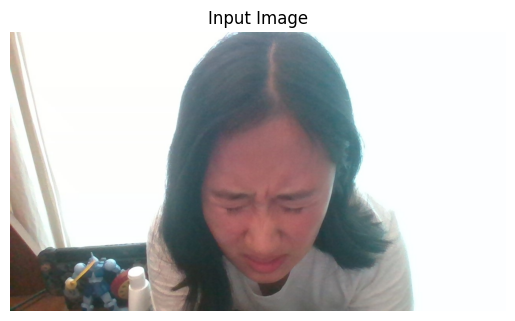

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_32_02_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

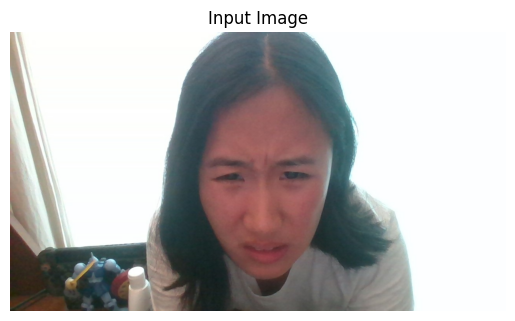

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_32_08_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

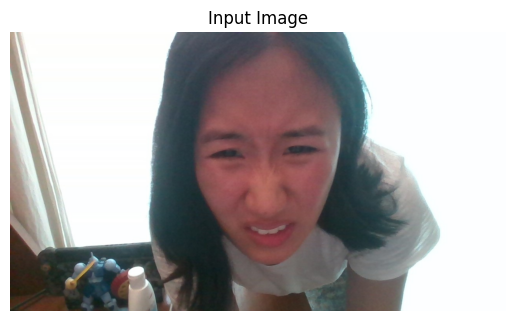

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_32_12_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

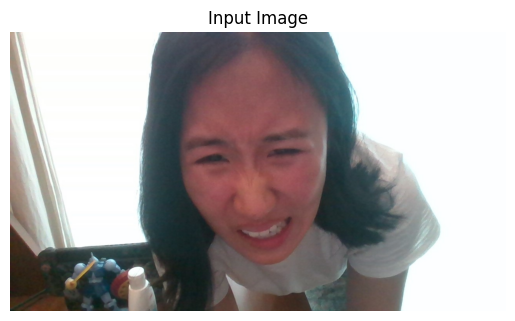

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_32_13_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

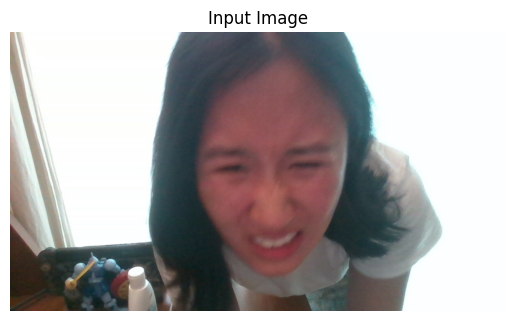

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_32_14_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

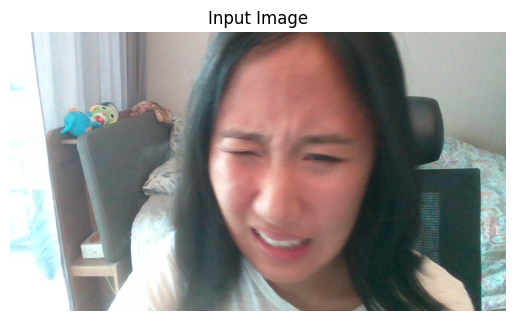

Prediction: Pain


In [ ]:
img_path = 'WIN_20241029_13_46_08_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

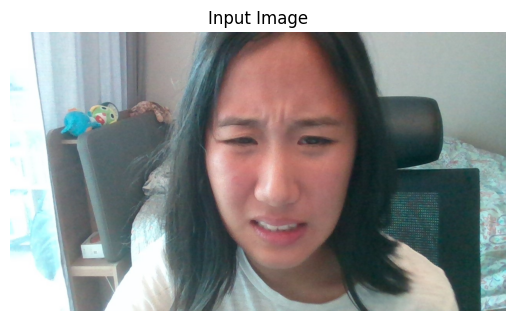

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_46_09_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

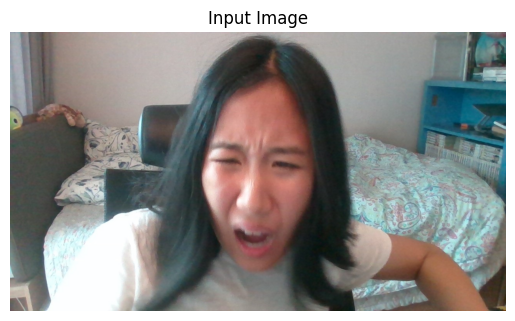

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_46_43_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

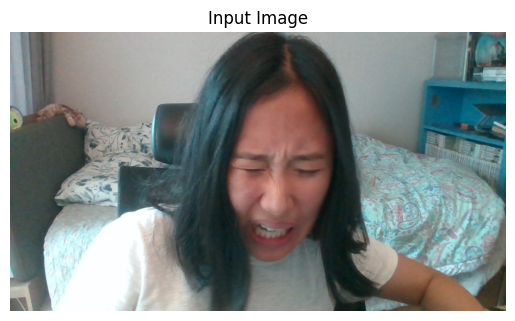

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_46_49_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

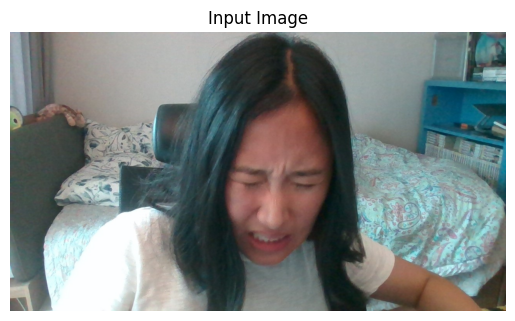

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_46_51_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

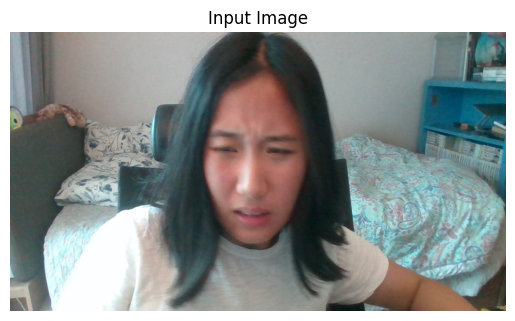

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_46_52_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)

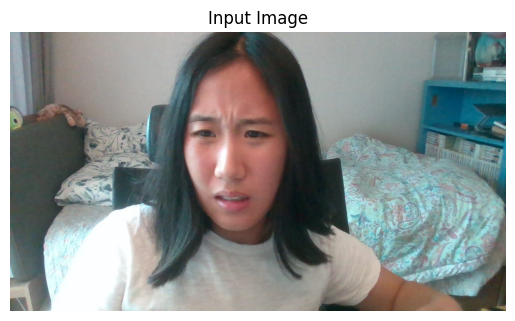

Prediction: No Pain


In [ ]:
img_path = 'WIN_20241029_13_46_55_Pro.jpg'
ImgSize = 200
predict_image(img_path, ImgSize)